## Solving the linear regression problem with gradient descent

Today we rewise the linear regression algorithm and it's gradient solution.

Your main goal will be to __derive and implement the gradient of MSE, MAE, L1 and L2 regularization terms__ respectively in general __vector form__ (when both single observation $\mathbf{x}_i$ and corresponding target value $\mathbf{y}_i$ are vectors).

This techniques will be useful later in Deep Learning module of our course as well.

We will work with [Boston housing prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) subset, which have been preprocessed for your convenience.

In [4]:
'''
If you are using Google Colab, uncomment the next lines to download `loss_and_derivatives.py` and `boston_subset.json`
You can open and change downloaded `.py` files in Colab using the "Files" sidebar on the left.
'''
# !wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/assignment0_02_Lin_reg/loss_and_derivatives.py
# !wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/assignment0_02_Lin_reg/boston_subset.json

'\nIf you are using Google Colab, uncomment the next lines to download `loss_and_derivatives.py` and `boston_subset.json`\nYou can open and change downloaded `.py` files in Colab using the "Files" sidebar on the left.\n'

In [5]:
# Run some setup code for this notebook.
import random
import numpy as np
import matplotlib.pyplot as plt

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import json
with open('boston_subset.json', 'r') as iofile:
    dataset = json.load(iofile)
feature_matrix = np.array(dataset['data'])
targets = np.array(dataset['target'])

## Warming up: matrix differentiation
_You will meet these questions later in Labs as well, so we highly recommend to answer them right here._

Credits: this theoretical part is copied from [YSDA Practical_DL course](https://github.com/yandexdataschool/Practical_DL/tree/spring2019/homework01) homework01.

Since it easy to google every task please please please try to understand what's going on. The "just answer" thing will not be  counted, make sure to present derivation of your solution. It is absolutely OK if you will find an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links: 
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)
[3](http://cal.cs.illinois.edu/~johannes/research/matrix%20calculus.pdf)
[4](http://research.microsoft.com/en-us/um/people/cmbishop/prml/index.htm)

#### Inline question 1
$$  
y = x^Tx,  \quad x \in \mathbb{R}^N 
$$

$$
\frac{dy}{dx} = \frac{d(x^Tx)}{dx} = \frac{d(x, x)}{dx} = 2x
$$

#### Inline question 2
$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$ 

$$
\frac{dy}{dA} = \frac{tr(dA \cdot B+A \cdot dB)}{dA} = \frac{tr(dA \cdot B)+tr(A \cdot dB)}{dA} = \frac{tr(B \cdot dA)}{dA} = \frac{(B^T, dA)}{dA} = B^T
$$

#### Inline question 3
$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N} 
$$

$$
\frac{dy}{dx} = \frac{d(x^TAc)}{dx} = \frac{d(x, Ac)}{dx} = \frac{(Ac, dx)}{dx} = Ac 
$$

$$
y = tr (y) = tr (x^TAc) = tr (cx^TA)
$$
$$
\frac {dy}{dA} = \frac {d (tr (x^TAc))}{dA} = \frac {d (tr (cx^TA))}{dA} = \frac {tr (d (cx^TA))}{dA} = \frac {tr (d (xc^T, A))}{dA} = \frac {(xc^T, dA)}{dA} = xc^T
$$

Hint for the latter (one of the ways): use *ex. 2* result and the fact 
$$
tr(ABC) = tr (CAB)
$$

## Loss functions and derivatives implementation
You will need to implement the methods from `loss_and_derivatives.py` to go further.
__In this assignment we ignore the bias term__, so the linear model takes simple form of 
$$
\hat{\mathbf{y}} = XW
$$
where no extra column of 1s is added to the $X$ matrix.

Implement the loss functions, regularization terms and their derivatives with reference to (w.r.t.) weight matrix. 

__Once again, you can assume that linear model is not required for bias term for now. The dataset is preprocessed for this case.__

Autoreload is a great stuff, but sometimes it does not work as intended. The code below aims to fix that. __Do not forget to save your changes in the `.py` file before reloading the desired functions.__

In [7]:
# This dirty hack might help if the autoreload has failed for some reason
try:
    del LossAndDerivatives
except:
    pass

from loss_and_derivatives import LossAndDerivatives

Mention, that in this case we compute the __MSE__ and __MAE__ for vector __y__. In the reference implementation we are averaging the error along the __y__ dimentionality as well.

E.g. for residuals vector $[1., 1., 1., 1.]$ the averaged error value will be $\frac{1}{4}(1. + 1. + 1. + 1.)$ 

This may be needed to get the desired mutliplier for loss functions derivatives. You also can refer to the `.mse` method implementation, which is already available in the `loss_and_derivatives.py`.

In [8]:
w = np.array([1., 1.])
x_n, y_n = feature_matrix, targets

Here come several asserts to check yourself:

In [9]:
w = np.array([1., 1.])
x_n, y_n = feature_matrix, targets

# Repeating data to make everything multi-dimentional
w = np.vstack([w[None, :] + 0.27, w[None, :] + 0.22, w[None, :] + 0.45, w[None, :] + 0.1]).T
y_n = np.hstack([y_n[:, None], 2*y_n[:, None], 3*y_n[:, None], 4*y_n[:, None]])

In [11]:
reference_mse_derivative = np.array([
    [ 7.32890068, 12.88731311, 18.82128365, 23.97731238],
    [ 9.55674399, 17.05397661, 24.98807528, 32.01723714]
])
reference_l2_reg_derivative = np.array([
    [2.54, 2.44, 2.9 , 2.2 ],
    [2.54, 2.44, 2.9 , 2.2 ]
])

assert np.allclose(
    reference_mse_derivative,
    LossAndDerivatives.mse_derivative(x_n, y_n, w), rtol=1e-3
), 'Something wrong with MSE derivative'

assert np.allclose(
    reference_l2_reg_derivative,
    LossAndDerivatives.l2_reg_derivative(w), rtol=1e-3
), 'Something wrong with L2 reg derivative'

print(
    'MSE derivative:\n{} \n\nL2 reg derivative:\n{}'.format(
        LossAndDerivatives.mse_derivative(x_n, y_n, w),
        LossAndDerivatives.l2_reg_derivative(w))
)

MSE derivative:
[[ 7.32890068 12.88731311 18.82128365 23.97731238]
 [ 9.55674399 17.05397661 24.98807528 32.01723714]] 

L2 reg derivative:
[[2.54 2.44 2.9  2.2 ]
 [2.54 2.44 2.9  2.2 ]]


In [13]:
reference_mae_derivative = np.array([
    [0.19708867, 0.19621798, 0.19621798, 0.19572906],
    [0.25574138, 0.25524507, 0.25524507, 0.25406404]
])
reference_l1_reg_derivative = np.array([
    [1., 1., 1., 1.],
    [1., 1., 1., 1.]
])

assert np.allclose(
    reference_mae_derivative,
    LossAndDerivatives.mae_derivative(x_n, y_n, w), rtol=1e-3
), 'Something wrong with MAE derivative'

assert np.allclose(
    reference_l1_reg_derivative,
    LossAndDerivatives.l1_reg_derivative(w), rtol=1e-3
), 'Something wrong with L1 reg derivative'

print(
    'MAE derivative:\n{} \n\nL1 reg derivative:\n{}'.format(
        LossAndDerivatives.mae_derivative(x_n, y_n, w),
        LossAndDerivatives.l1_reg_derivative(w))
)

MAE derivative:
[[0.19708867 0.19621798 0.19621798 0.19572906]
 [0.25574138 0.25524507 0.25524507 0.25406404]] 

L1 reg derivative:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Gradient descent on the real data
Here comes small loop with gradient descent algorithm. We compute the gradient over the whole dataset.

In [14]:
def get_w_by_grad(X, Y, w_0, loss_mode='mse', reg_mode=None, lr=0.05, n_steps=100, reg_coeff=0.05):
    if loss_mode == 'mse':
        loss_function = LossAndDerivatives.mse
        loss_derivative = LossAndDerivatives.mse_derivative
    elif loss_mode == 'mae':
        loss_function = LossAndDerivatives.mae
        loss_derivative = LossAndDerivatives.mae_derivative
    else:
        raise ValueError('Unknown loss function. Available loss functions: `mse`, `mae`')
    
    if reg_mode is None:
        reg_function = LossAndDerivatives.no_reg
        reg_derivative = LossAndDerivatives.no_reg_derivative # lambda w: np.zeros_like(w)
    elif reg_mode == 'l2':
        reg_function = LossAndDerivatives.l2_reg
        reg_derivative = LossAndDerivatives.l2_reg_derivative
    elif reg_mode == 'l1':
        reg_function = LossAndDerivatives.l1_reg
        reg_derivative = LossAndDerivatives.l1_reg_derivative
    else:
        raise ValueError('Unknown regularization mode. Available modes: `l1`, `l2`, None')
    
    
    w = w_0.copy()

    for i in range(n_steps):
        empirical_risk = loss_function(X, Y, w) + reg_coeff * reg_function(w)
        gradient = loss_derivative(X, Y, w) + reg_coeff * reg_derivative(w)
        gradient_norm = np.linalg.norm(gradient)
        if gradient_norm > 5.:
            gradient = gradient / gradient_norm * 5.
        w -= lr * gradient
        
        if i % 25 == 0:
            print('Step={}, loss={},\ngradient values={}\n'.format(i, empirical_risk, gradient))
    return w


Let's check how it works.

In [15]:
# Initial weight matrix
w = np.ones((2,1), dtype=float)
y_n = targets[:, None] 

In [16]:
w_grad = get_w_by_grad(x_n, y_n, w, loss_mode='mse', reg_mode='l2', n_steps=250)

Step=0, loss=231.28353984777308,
gradient values=[[3.03360308]
 [3.97457575]]

Step=25, loss=58.512903511682694,
gradient values=[[2.28551977]
 [4.44706638]]

Step=50, loss=48.29584498872881,
gradient values=[[-0.89558132]
 [ 0.76425616]]

Step=75, loss=47.292783042717005,
gradient values=[[-0.48111511]
 [ 0.40907079]]

Step=100, loss=47.004190920297106,
gradient values=[[-0.25806412]
 [ 0.21942022]]

Step=125, loss=46.921159712801064,
gradient values=[[-0.1384223 ]
 [ 0.11769421]]

Step=150, loss=46.897270698227686,
gradient values=[[-0.07424796]
 [ 0.06312967]]

Step=175, loss=46.890397559386315,
gradient values=[[-0.03982566]
 [ 0.03386195]]

Step=200, loss=46.88842007984702,
gradient values=[[-0.02136197]
 [ 0.01816312]]

Step=225, loss=46.887851136687495,
gradient values=[[-0.01145829]
 [ 0.00974247]]



### Comparing with `sklearn`
Finally, let's compare our model with `sklearn` implementation.

In [17]:
from sklearn.linear_model import Ridge

In [18]:
lr = Ridge(alpha=0.05)
lr.fit(x_n, y_n)
print('sklearn linear regression implementation delivers MSE = {}'.format(np.mean((lr.predict(x_n) - y_n)**2)))

sklearn linear regression implementation delivers MSE = 42.535412451283136


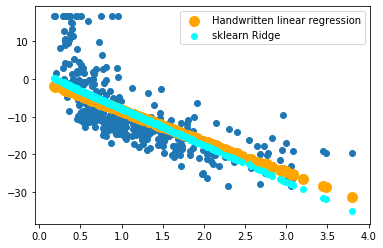

In [19]:
plt.scatter(x_n[:, -1], y_n[:, -1])
plt.scatter(x_n[:, -1], x_n.dot(w_grad)[:, -1], color='orange', label='Handwritten linear regression', linewidth=5)
plt.scatter(x_n[:, -1], lr.predict(x_n), color='cyan', label='sklearn Ridge')
plt.legend()
plt.show()

While the solutions may look like a bit different, remember, that handwritten linear regression was unable to fit the bias term, it was equal to $0$ by default.

### Submit your work
To submit your work you need to log into Yandex contest (link will be provided later) and upload the `loss_and_derivatives.py` file for the corresponding problem.